In [39]:
import pandas as pd
df=pd.read_csv("titanic_train.csv")
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


### 缺失值处理：fillna

In [40]:
df["Age"]=df["Age"].fillna(df["Age"].median())
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


### 查看性别列组成unique（）

In [41]:
print(df["Sex"].unique())

['male' 'female']


### 将性别列的male与female用数字0、1代替

In [42]:
df.loc[df["Sex"]=="male","Sex"]=0
df.loc[df["Sex"]=="female","Sex"]=1

同上，对“Embarked”列做类似操作

In [43]:
print(df["Embarked"].unique())
df.loc[df["Embarked"]=="S","Embarked"]=1
df.loc[df["Embarked"]=="C","Embarked"]=2
df.loc[df["Embarked"]=="Q","Embarked"]=3

['S' 'C' 'Q' nan]


对于缺失值，用出现次数最多的值填充

In [44]:
df["Embarked"].value_counts()

1    644
2    168
3     77
Name: Embarked, dtype: int64

In [45]:
df["Embarked"]=df["Embarked"].fillna(1)

In [46]:
df["Embarked"].value_counts()

1    646
2    168
3     77
Name: Embarked, dtype: int64

## 使用线性回归算法进行预测

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

predictors=["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]

#模型初始化
alg=LinearRegression()
kf=KFold(df.shape[0],n_folds=3, shuffle=False,random_state=None)

predictions=[]
#train,test为索引
for train,test in kf:
    train_predictors=(df[predictors].iloc[train,:])
    train_target=df["Survived"].iloc[train]
    #训练模型
    alg.fit(train_predictors,train_target)
    #用测试集测试模型
    test_predictions=alg.predict(df[predictors].iloc[test,:])
    #print(test_predictions)
    predictions.append(test_predictions)

查看模型准确率

In [48]:
import numpy as np

#将3折交叉验证的3次预测结果合并
predictions=np.concatenate(predictions,axis=0)
#print(predictions)
predictions[predictions>0.5]=1
predictions[predictions<=0.5]=0
accuracy=sum(predictions[predictions==df["Survived"]])/len(predictions)
print(accuracy)

0.261503928171


用专门的测试集做测试

In [49]:
df_test=pd.read_csv("test.csv")
df_test["Age"]=df_test["Age"].fillna(df_test["Age"].median())
df_test["Fare"]=df_test["Fare"].fillna(df_test["Fare"].median())
df_test.loc[df_test["Sex"]=="male","Sex"]=0
df_test.loc[df_test["Sex"]=="female","Sex"]=1
df_test["Embarked"]=df_test["Embarked"].fillna("S")

df_test.loc[df_test["Embarked"]=="S","Embarked"]=1
df_test.loc[df_test["Embarked"]=="C","Embarked"]=2
df_test.loc[df_test["Embarked"]=="Q","Embarked"]=3

## 用随机森林算法做预测（可以调节其参数）

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation

predictors=["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]

#模型初始化,也可以修改其参数，得到的结果会不同
alg=RandomForestClassifier()
kf=KFold(df.shape[0],n_folds=3, shuffle=False,random_state=None)
scores=cross_validation.cross_val_score(alg,df[predictors],df["Survived"],cv=kf)

print(scores.mean())

0.787878787879


In [51]:
alg=RandomForestClassifier(n_estimators=50)
kf=KFold(df.shape[0],n_folds=3, shuffle=False,random_state=None)
scores=cross_validation.cross_val_score(alg,df[predictors],df["Survived"],cv=kf)

print(scores.mean())

0.789001122334


从数据入手，分析数据

In [52]:
df["familysize"]=df["SibSp"]+df["Parch"]

## 随机森林特征重要性分析（sklearn.feature_selection）

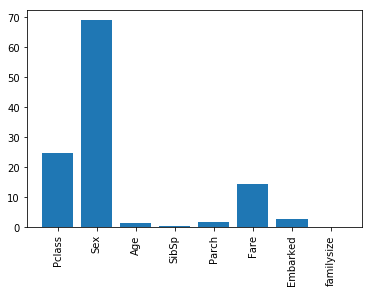

In [53]:
from sklearn.feature_selection import SelectKBest,f_classif
import matplotlib.pyplot as plt

predictors=["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked","familysize"]
selector=SelectKBest(f_classif,k=5)
selector.fit(df[predictors],df["Survived"])

scores=-np.log10(selector.pvalues_)

plt.bar(range(len(predictors)),scores)
plt.xticks(range(len(predictors)),predictors,rotation="vertical")
plt.show()

## ensemble算法

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

algorithms=[
    [GradientBoostingClassifier(),["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked","familysize"]],
    [LogisticRegression(),["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked","familysize"]]
]

kf=KFold(df.shape[0],n_folds=3,random_state=1)

predictions=[]
for train,test in kf:
    train_target=df["Survived"].iloc[train]
    full_test_predictions=[]
    for alg,predictors in algorithms:
        alg.fit(df[predictors].iloc[train,:],train_target)
        #the .astype(float) is necessary to convert the dataframe to all floats and avoid an sklearn error
        test_predictions=alg.predict_proba(df[predictors].iloc[test,:].astype(float))[:,1]
        full_test_predictions.append(test_predictions)
    test_predictions=(full_test_predictions[0]+full_test_predictions[1])/2
    test_predictions[test_predictions>0.5]=1
    test_predictions[test_predictions<=0.5]=0
    predictions.append(test_predictions)
    
predictions=np.concatenate(predictions,axis=0)

accuracy=sum(predictions[predictions==df["Survived"]])/len(predictions)
print(accuracy)

0.265993265993


## 疑问？准确率也太低了？？？？

## 总结：特征提取、缺失值处理、字符转数值、多种分类器比较、特征重要性比较、ensemble模型